# Animal Shelter Analytics

> ### Technical Skills for this Project: Python(Pandas, Seaborn), EDA, Statistics.

Task Details: looking for a way to make meaningful impact. To do that, you'll explore and analyze an animal shelter's data and give them 1-3 actionable insights.

I need to analyze the data set to understand this problem and propose data-driven solutions.

## Table of contents
1. [Pre processing](#introduction)
2. [Exploratory Data Analysis](#paragraph1)
3. [Insights](#paragraph2)

In [223]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [224]:
# First view to the dataset
C_i = pd.read_csv('Austin_Animal_Center_Intakes.csv', parse_dates=True)
C_o = pd.read_csv('Austin_Animal_Center_Outcomes.csv', parse_dates=True)
C_sm = pd.read_csv('Austin_Animal_Center_Stray_Map.csv', parse_dates=True)

In [225]:
C_i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124120 entries, 0 to 124119
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         124120 non-null  object
 1   Name              85069 non-null   object
 2   DateTime          124120 non-null  object
 3   MonthYear         124120 non-null  object
 4   Found Location    124120 non-null  object
 5   Intake Type       124120 non-null  object
 6   Intake Condition  124120 non-null  object
 7   Animal Type       124120 non-null  object
 8   Sex upon Intake   124119 non-null  object
 9   Age upon Intake   124120 non-null  object
 10  Breed             124120 non-null  object
 11  Color             124120 non-null  object
dtypes: object(12)
memory usage: 11.4+ MB


Observations: 
    
    - in C_i im going to delete 'MonthYear'
    
    - C_i has some null values 
    
    - need to fix the datetime (C_i)
    
    - there are some dtypes to change 
    
    - some strings got special caracters 
    
    - i can separete the hour of datetime
    
    - im going to clean all datasets just for practice
    

## Section 01: Pre Processing <a name="introduction"></a>

In [226]:
# im going ti start with C_sm, fixing dates
C_sm['Intake Date'] = pd.to_datetime(C_sm['Intake Date'])

In [227]:
C_sm.drop(['Image Link'], axis=1, inplace=True)

In [228]:
#chaging dtypes
C_sm['At AAC'] = C_sm['At AAC'].astype('category')
C_sm['Type'] = C_sm['Type'].astype('category')
C_sm['Sex'] = C_sm['Sex'].astype('category')

In [229]:
#Set the id column
C_sm = C_sm.set_index('Animal ID')

In [230]:
#finished firt dataset
C_sm

,Found Location,At AAC,Intake Date,Type,Looks Like,Color,Sex,Age
Animal ID,,,,,,,,
A814119,11800 GREEN GROVE DRIVE\nAUSTIN 78725\n(30.221...,Yes (come to the shelter),2021-02-19,Dog,Pit Bull,Brown Brindle,Neutered Male,3 years
A829667,9807 MARLBOROUGH DRIVE\nAUSTIN 78753\n(30.3573...,Yes (come to the shelter),2021-02-20,Dog,Anatolian Shepherd Mix,Yellow,Intact Male,2 years
A829669,12501 TECH RIDGE BOULEVARD\nAUSTIN 78753\n(30....,Yes (come to the shelter),2021-02-20,Dog,Labrador Retriever Mix,Tan/White,Spayed Female,2 years
A829713,10605 OLD LOCKHART ROAD\nAUSTIN 78747\n(30.128...,Yes (come to the shelter),2021-02-21,Dog,Doberman Pinsch,Black/Tan,Intact Female,6 months
A829659,"14204 JACOBSON ROAD\nAUSTIN 78617\n(30.137238,...",Yes (come to the shelter),2021-02-19,Dog,Labrador Retriever,Black/White,Intact Female,5 months
A829660,"14204 JACOBSON ROAD\nAUSTIN 78617\n(30.137238,...",Yes (come to the shelter),2021-02-19,Dog,Carolina Dog,Yellow Brindle/White,Intact Female,5 months
A829661,"9604 CARSON CREEK\nAUSTIN 78617\n(30.224098, -...",Yes (come to the shelter),2021-02-19,Cat,Domestic Shorthair,Orange Tabby,Intact Male,1 year
A829664,"DEL VALLE AUSTIN 78719\n(30.143087, -97.673385)",Yes (come to the shelter),2021-02-20,Dog,Labrador Retriever,Brown/Black,Intact Male,2 years
A829672,"AUSTIN 78744\n(30.186349, -97.738673)",Yes (come to the shelter),2021-02-20,Dog,Doberman Pinsch,Black/Tan,Intact Female,6 months


In [231]:
C_o['DateTime']

0         05/08/2019 06:20:00 PM
1         07/18/2018 04:02:00 PM
2         08/16/2020 11:38:00 AM
3         02/13/2016 05:59:00 PM
4         03/18/2014 11:47:00 AM
                   ...          
124486    03/03/2021 04:20:00 PM
124487    12/28/2020 03:49:00 PM
124488    03/03/2021 04:59:00 PM
124489    03/03/2021 05:57:00 PM
124490    03/03/2021 05:19:00 PM
Name: DateTime, Length: 124491, dtype: object

In [232]:
C_o['Name'] = C_o['Name'].str.replace('*', '')

In [233]:
C_o['Date of Birth'] = pd.to_datetime(C_o['Date of Birth'])

In [234]:
C_o.drop(['MonthYear'], axis=1, inplace=True)

In [235]:
hour = C_o['DateTime'].str.split(' ',1, expand = True)
C_o['hour'] = hour[0]
C_o['hour'] = hour[1]

In [236]:
C_o['DateTime'] = C_o['DateTime'].str.split(' ', expand = True)

In [237]:
C_o['DateTime'] = pd.to_datetime(C_o['DateTime'])

In [238]:
#Outcome Type- Animal Type - Sex upon Outcome - Outcome Subtype
C_o['Outcome Subtype'].value_counts()

Partner                30811
Foster                 10901
Rabies Risk             3682
Suffering               3237
SCRP                    3211
Snr                     2680
In Kennel                596
Aggressive               539
Offsite                  383
Medical                  303
In Foster                295
At Vet                   256
Behavior                 159
Enroute                   84
Field                     36
Underage                  36
Court/Investigation       29
In Surgery                22
Possible Theft            16
Barn                      11
Prc                       10
Customer S                 7
Emer                       4
Name: Outcome Subtype, dtype: int64

In [239]:
#chaging dtypes
C_o['Outcome Type'] = C_o['Outcome Type'].astype('category')
C_o['Animal Type'] = C_o['Animal Type'].astype('category')
C_o['Sex upon Outcome'] = C_o['Sex upon Outcome'].astype('category')

In [240]:
#finished second dataset
C_o.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124491 entries, 0 to 124490
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         124491 non-null  object        
 1   Name              85466 non-null   object        
 2   DateTime          124491 non-null  datetime64[ns]
 3   Date of Birth     124491 non-null  datetime64[ns]
 4   Outcome Type      124471 non-null  category      
 5   Outcome Subtype   57308 non-null   object        
 6   Animal Type       124491 non-null  category      
 7   Sex upon Outcome  124490 non-null  category      
 8   Age upon Outcome  124486 non-null  object        
 9   Breed             124491 non-null  object        
 10  Color             124491 non-null  object        
 11  hour              124491 non-null  object        
dtypes: category(3), datetime64[ns](2), object(7)
memory usage: 8.9+ MB


In [241]:
#Set the id column
C_i = C_i.set_index('Animal ID')

#cleaning strings in name
C_i['Name'] = C_i['Name'].str.replace('*', '')

#eliminate useless columns
C_i.drop(['MonthYear'], axis=1, inplace=True)

#create another maybe usefull column
hour = C_i['DateTime'].str.split(' ',1, expand = True)
C_i['hour'] = hour[0]
C_i['hour'] = hour[1]
C_i['DateTime'] = C_i['DateTime'].str.split(' ', expand = True)
C_i['DateTime'] = pd.to_datetime(C_i['DateTime'])

In [242]:
#chaging dtypes
C_i['Intake Type'] = C_i['Intake Type'].astype('category')
C_i['Intake Condition'] = C_i['Intake Condition'].astype('category')
C_i['Animal Type'] = C_i['Animal Type'].astype('category')
C_i['Sex upon Intake'] = C_i['Sex upon Intake'].astype('category')

In [243]:
#Intake Type	Intake Condition	Animal Type	Sex upon Intake
C_i['Sex upon Intake'].value_counts()

Intact Male      40316
Intact Female    38118
Neutered Male    19142
Spayed Female    16310
Unknown          10233
Name: Sex upon Intake, dtype: int64

In [244]:
#finished third dataset
C_i.info()

<class 'pandas.core.frame.DataFrame'>
Index: 124120 entries, A786884 to A830181
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Name              85069 non-null   object        
 1   DateTime          124120 non-null  datetime64[ns]
 2   Found Location    124120 non-null  object        
 3   Intake Type       124120 non-null  category      
 4   Intake Condition  124120 non-null  category      
 5   Animal Type       124120 non-null  category      
 6   Sex upon Intake   124119 non-null  category      
 7   Age upon Intake   124120 non-null  object        
 8   Breed             124120 non-null  object        
 9   Color             124120 non-null  object        
 10  hour              124120 non-null  object        
dtypes: category(4), datetime64[ns](1), object(6)
memory usage: 8.1+ MB


In [245]:
#Cheking duplicates
C_i.duplicated().any()
C_i = C_i.drop_duplicates()

In [246]:
C_o.duplicated().any()
C_o = C_o.drop_duplicates()

In [247]:
C_sm.duplicated().any()

False

In [248]:
#Cheking null values
C_i.isna().sum()

Name                35260
DateTime                0
Found Location          0
Intake Type             0
Intake Condition        0
Animal Type             0
Sex upon Intake         1
Age upon Intake         0
Breed                   0
Color                   0
hour                    0
dtype: int64

In [249]:
C_o.isna().sum()

Animal ID               0
Name                39020
DateTime                0
Date of Birth           0
Outcome Type           20
Outcome Subtype     67175
Animal Type             0
Sex upon Outcome        1
Age upon Outcome        5
Breed                   0
Color                   0
hour                    0
dtype: int64

In [250]:
C_sm.isna().sum()

Found Location    0
At AAC            0
Intake Date       0
Type              0
Looks Like        0
Color             0
Sex               0
Age               0
dtype: int64

In [251]:
# im not going to delete the null values because i dont think they re going to be a problem 

## Section 2: Exploratory Data Analysis <a name="paragraph1"></a>

In [252]:
#Basic statistics 
C_i.describe(include='all')

<ipython-input-252-aa6ff710ce51>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  C_i.describe(include='all')


,Name,DateTime,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,hour
count,85033,120293,120293,120293,120293,120293,120292,120293,120293,120293,120293
unique,15927,2709,53703,6,10,5,5,52,2629,595,1303
top,Max,2014-07-09 00:00:00,Austin (TX),Stray,Normal,Dog,Intact Male,1 year,Domestic Shorthair Mix,Black/White,11:01:00 AM
freq,622,132,22379,83564,104907,69448,39114,21449,29295,12629,547
first,NaN,2013-10-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2021-03-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [253]:
# top	Max	2014-07-09 00:00:00	Austin (TX)	Stray	Normal	Dog	Intact Male	1 year	Domestic Shorthair Mix	Black/White	11:01:00 AM
# 2016 is the mean and 6 is the mean month
# im going to chek the distribution and other things by each column 

In [254]:
#how many pets are without a name?
ss = C_i['Name'].isna().sum()


In [255]:
C_i['year'] = pd.DatetimeIndex(C_i['DateTime']).year
C_i['month'] = pd.DatetimeIndex(C_i['DateTime']).month
C_i['day'] = pd.DatetimeIndex(C_i['DateTime']).day

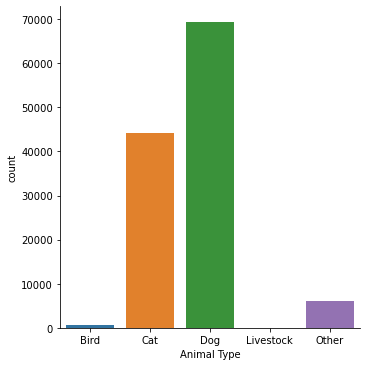

In [256]:
sns.catplot(x="Animal Type", kind="count", data=C_i)

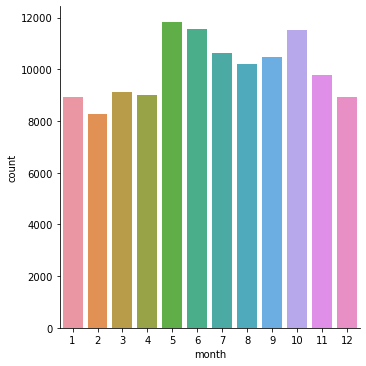

In [257]:
sns.catplot(x="month", kind="count", data=C_i)

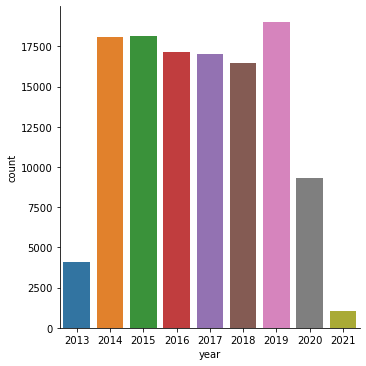

In [258]:
sns.catplot(x="year", kind="count", data=C_i)

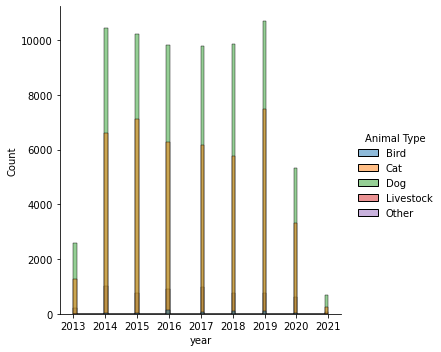

In [259]:
sns.displot(C_i, x="year", hue="Animal Type")

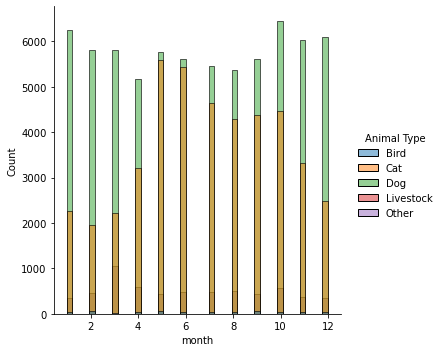

In [260]:
sns.displot(C_i, x="month", hue="Animal Type")

In [261]:
C_i['Animal Type'].value_counts()/len(C_i)*100

Dog          57.732370
Cat          36.780195
Other         5.031049
Bird          0.439760
Livestock     0.016626
Name: Animal Type, dtype: float64

#### Observations: :

- there are 35260 pets without a name

- The months with more animals sheltered are may, june and october

- We can see that 2019 is the year with more animals sheletered

- The animal type more sheltered are dogs with 57% and Cats with 36%

In [262]:
C_i['Intake Type'].value_counts()

Stray                 83564
Owner Surrender       24168
Public Assist          7481
Wildlife               4557
Abandoned               266
Euthanasia Request      257
Name: Intake Type, dtype: int64

In [263]:
C_i['Intake Type'].value_counts()/len(C_i)*100

Stray                 69.467051
Owner Surrender       20.090945
Public Assist          6.218982
Wildlife               3.788250
Abandoned              0.221127
Euthanasia Request     0.213645
Name: Intake Type, dtype: float64

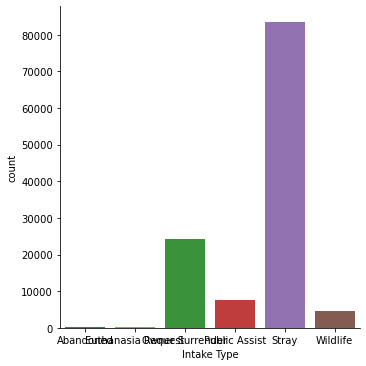

In [264]:
sns.catplot(x="Intake Type", kind="count", data=C_i)

Stray                 83564
Owner Surrender       24168
Public Assist          7481
Wildlife               4557
Abandoned               266
Euthanasia Request      257
Name: Intake Type, dtype: int64

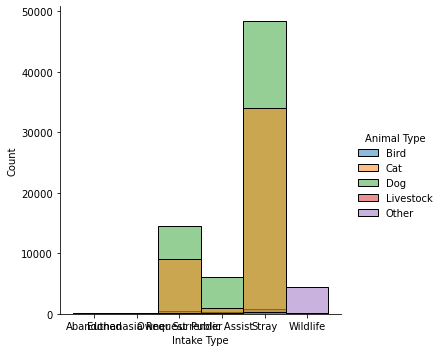

In [265]:
sns.displot(C_i, x="Intake Type", hue="Animal Type")
C_i['Intake Type'].value_counts()

In [266]:
C_i[(C_i['Intake Type'] == 'Stray') & (C_i['Intake Condition'] == 'Sick')].count()

Name                1102
DateTime            2546
Found Location      2546
Intake Type         2546
Intake Condition    2546
Animal Type         2546
Sex upon Intake     2546
Age upon Intake     2546
Breed               2546
Color               2546
hour                2546
year                2546
month               2546
day                 2546
dtype: int64

In [267]:
ddd = C_i.drop(C_i[C_i['Intake Condition']=='Normal'].index)

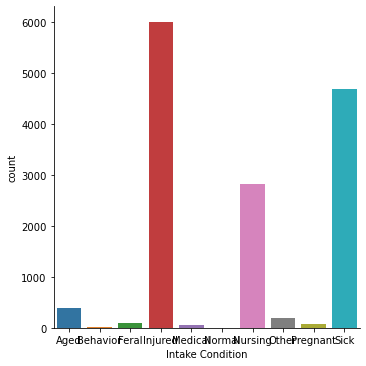

In [268]:
sns.catplot(x="Intake Condition", kind='count', data=ddd)
# there are more normal condition but i want to see in what other condition are more

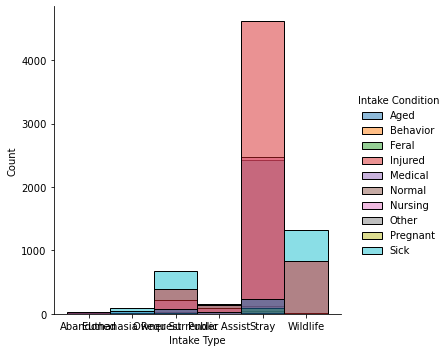

In [269]:
sns.displot(ddd, x="Intake Type", hue="Intake Condition")#without intake condition == normal 

Normal      104907
Injured       6593
Sick          4968
Nursing       2910
Aged           430
Other          223
Feral          102
Pregnant        77
Medical         63
Behavior        20
Name: Intake Condition, dtype: int64

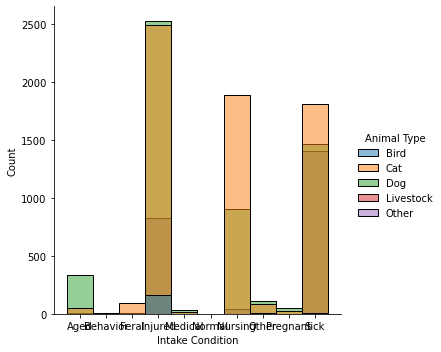

In [270]:
sns.displot(ddd, x="Intake Condition", hue="Animal Type")
C_i['Intake Condition'].value_counts()

In [271]:
C_i[(C_i['Animal Type'] == 'Dog') & (C_i['Intake Condition'] == 'Sick')].count()

Name                1075
DateTime            1633
Found Location      1633
Intake Type         1633
Intake Condition    1633
Animal Type         1633
Sex upon Intake     1633
Age upon Intake     1633
Breed               1633
Color               1633
hour                1633
year                1633
month               1633
day                 1633
dtype: int64

#### Observations: 

- The most intake type are stray and Owner Surrender with 69% and 20% respectively

- Dogs are more sheltered by being stray, surrender by owner and public assist than every other animal 

- There are 2546 animals in the categoty of _stray sick_

- Besides Normal condition injured, sick and nursing are the highest intake condition

- The stray ones are the more injured

In [272]:
ifixed = C_i.drop(['Breed', 'Age upon Intake', 'hour', 'Found Location', 'DateTime', 'Name'], axis=1)

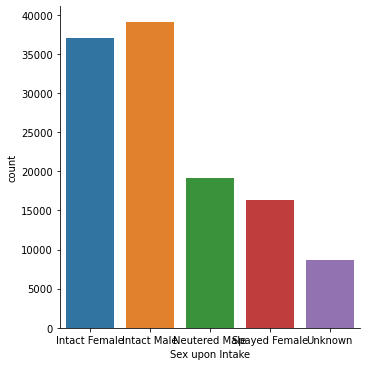

In [273]:
sns.catplot(x="Sex upon Intake", kind="count", data=C_i)

1 year      21449
2 years     18943
1 month     11374
3 years      7428
2 months     6453
4 years      4447
4 weeks      4144
5 years      4054
3 months     3183
3 weeks      3155
Name: Age upon Intake, dtype: int64

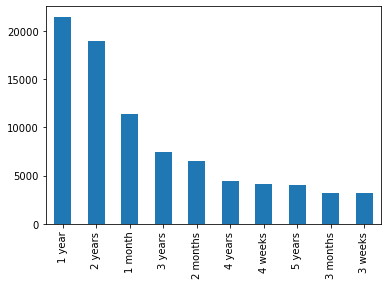

In [274]:
C_i['Age upon Intake'].value_counts().head(10).plot(kind='bar')
C_i['Age upon Intake'].value_counts().head(10)

Austin (TX)                          22379
Travis (TX)                           1897
Outside Jurisdiction                  1511
7201 Levander Loop in Austin (TX)      783
Manor (TX)                             598
Name: Found Location, dtype: int64

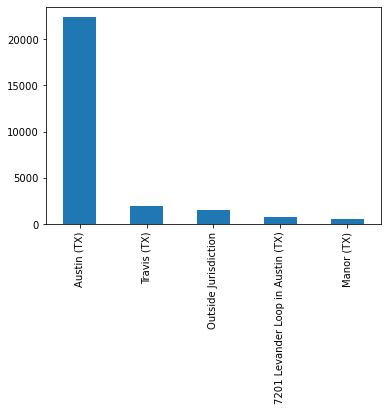

In [275]:
C_i['Found Location'].value_counts().head().plot(kind='bar')
C_i['Found Location'].value_counts().head()

In [277]:
intake_dummy = pd.get_dummies(C_i['Intake Type'], prefix='Intake Type')
intakec_dummy = pd.get_dummies(C_i['Intake Condition'], prefix='Intake Condition')
animal_dummy = pd.get_dummies(C_i['Animal Type'], prefix='Animal Type')
sex_dummy = pd.get_dummies(C_i['Sex upon Intake'], prefix='Sex upon Intake')
#color_dummy = pd.get_dummies(C_i['Color'], prefix='Color')

In [278]:
ifixed = pd.concat([ifixed, intake_dummy], axis=1)
ifixed = pd.concat([ifixed, intakec_dummy], axis=1)
ifixed = pd.concat([ifixed, animal_dummy], axis=1)
ifixed = pd.concat([ifixed, sex_dummy], axis=1)
#ifixed = pd.concat([ifixed, color_dummy], axis=1)

In [279]:
ifixed = ifixed.drop(['Intake Type', 'Intake Condition', 'Animal Type', 'Sex upon Intake', 'Color'], axis=1)

In [280]:
# im going to see relation plots and regressions, and pearson relation.

In [282]:
ifixed

,year,month,day,Intake Type_Abandoned,Intake Type_Euthanasia Request,Intake Type_Owner Surrender,Intake Type_Public Assist,Intake Type_Stray,Intake Type_Wildlife,Intake Condition_Aged,Intake Condition_Behavior,Intake Condition_Feral,Intake Condition_Injured,Intake Condition_Medical,Intake Condition_Normal,Intake Condition_Nursing,Intake Condition_Other,Intake Condition_Pregnant,Intake Condition_Sick,Animal Type_Bird,Animal Type_Cat,Animal Type_Dog,Animal Type_Livestock,Animal Type_Other,Sex upon Intake_Intact Female,Sex upon Intake_Intact Male,Sex upon Intake_Neutered Male,Sex upon Intake_Spayed Female,Sex upon Intake_Unknown
Animal ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A786884,2019,1,3,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
A706918,2015,7,5,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
A724273,2016,4,14,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
A665644,2013,10,21,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0
A682524,2014,6,29,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A828158,2021,1,8,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
A830183,2021,3,3,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
A830180,2021,3,3,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [283]:
correlation = ifixed.corr(method='pearson')

In [284]:
correlation2 = ifixed.corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

In [285]:
correlation2

,year,month,day,Intake Type_Abandoned,Intake Type_Euthanasia Request,Intake Type_Owner Surrender,Intake Type_Public Assist,Intake Type_Stray,Intake Type_Wildlife,Intake Condition_Aged,Intake Condition_Behavior,Intake Condition_Feral,Intake Condition_Injured,Intake Condition_Medical,Intake Condition_Normal,Intake Condition_Nursing,Intake Condition_Other,Intake Condition_Pregnant,Intake Condition_Sick,Animal Type_Bird,Animal Type_Cat,Animal Type_Dog,Animal Type_Livestock,Animal Type_Other,Sex upon Intake_Intact Female,Sex upon Intake_Intact Male,Sex upon Intake_Neutered Male,Sex upon Intake_Spayed Female,Sex upon Intake_Unknown
year,1.0,-0.12,-0.013,0.078,-0.048,0.043,-0.0022,-0.035,-0.0098,-0.011,0.021,-0.012,0.026,0.037,-0.036,0.028,-0.0047,0.0018,0.0091,0.013,0.00058,-0.0033,0.0029,0.0019,0.016,0.012,-0.0097,-0.028,-0.00084
month,-0.12,1.0,-0.02,-0.011,0.0092,-0.0071,-0.0073,0.026,-0.038,-0.0035,0.0061,0.00036,-0.0079,0.0023,0.018,-0.022,-0.008,-0.0068,-0.0015,-0.0036,0.051,-0.033,-0.003,-0.035,0.026,0.012,-0.014,-0.011,-0.034
day,-0.013,-0.02,1.0,-0.00022,-0.0022,0.0032,-0.016,0.0022,0.0084,-0.0049,-0.00079,0.00093,0.0053,-0.00013,0.0028,-0.0061,-0.0033,-0.0049,-0.0033,-0.00016,0.0087,-0.012,0.0021,0.0088,0.0014,-0.00041,-0.0015,-0.0038,0.0055
Intake Type_Abandoned,0.078,-0.011,-0.00022,1.0,-0.0022,-0.024,-0.012,-0.071,-0.0093,-0.0028,-0.00061,-0.0014,-0.009,0.03,-0.0037,0.019,-0.002,-0.0012,1.3e-05,-0.0031,6e-05,0.00051,-0.00061,-0.00031,0.0085,0.0066,-0.0074,-0.0078,-0.0063
Intake Type_Euthanasia Request,-0.048,0.0092,-0.0022,-0.0022,1.0,-0.023,-0.012,-0.07,-0.0092,0.13,-0.0006,-0.0013,0.0047,-0.0011,-0.074,-0.0073,0.0064,-0.0012,0.085,0.0051,-0.014,0.012,-0.0006,0.00088,-0.012,-0.016,0.021,0.016,-0.00045
Intake Type_Owner Surrender,0.043,-0.0071,0.0032,-0.024,-0.023,1.0,-0.13,-0.76,-0.099,0.0026,0.0096,-0.0082,-0.079,0.003,0.087,-0.048,-0.0018,-0.0012,-0.019,-0.015,0.004,0.027,-0.0049,-0.064,-0.089,-0.12,0.17,0.2,-0.12
Intake Type_Public Assist,-0.0022,-0.0073,-0.016,-0.012,-0.012,-0.13,1.0,-0.39,-0.051,0.0036,0.0074,-0.004,-0.036,-0.0059,0.043,-0.017,0.025,0.0016,-0.024,0.034,-0.12,0.13,-0.00065,-0.019,-0.063,-0.031,0.1,0.045,-0.035
Intake Type_Stray,-0.035,0.026,0.0022,-0.071,-0.07,-0.76,-0.39,1.0,-0.3,-0.012,-0.011,0.011,0.041,-0.0006,-0.0037,0.06,-0.01,0.0025,-0.082,-0.028,0.13,0.0062,0.0057,-0.28,0.16,0.18,-0.17,-0.17,-0.16
Intake Type_Wildlife,-0.0098,-0.038,0.0084,-0.0093,-0.0092,-0.099,-0.051,-0.3,1.0,-0.011,-0.0026,-0.0043,0.11,-0.0045,-0.21,-0.026,-0.0045,-0.005,0.25,0.056,-0.15,-0.23,-0.0026,0.84,-0.13,-0.13,-0.086,-0.078,0.69
Intake Condition_Aged,-0.011,-0.0035,-0.0049,-0.0028,0.13,0.0026,0.0036,-0.012,-0.011,1.0,-0.00077,-0.0017,-0.014,-0.0014,-0.16,-0.0094,-0.0026,-0.0015,-0.012,-0.004,-0.03,0.035,-0.00077,-0.012,-0.023,-0.023,0.031,0.038,-0.011


#### Observations: 

- intact male are the most sheltered sex upon intake 
- 1 and 2 years have the majority of the animals sheltered
- There are a strong co relation between _Animal Type_Other and Intake Type_Wildlife_
- There are a strong co relation between _Sex upon Intake_Unknown and Intake Type_Wildlife_
- There are a strong negative co relation between _Intake Condition_Normal and Intake Condition_Injured_
- There are negative co relation between _Intake Condition_Normal and Intake Condition_Sick_
- There are co relation between _Sex upon Intake_Unknown and Animal Type_Other_

### Actionable Insights <a name="paragraph2"></a>
#### Some Business questions:

- Which locations are booming with stray animals? Can we manage a stray neutering campaign in that area?
- Are we frequently intaking strays that are sick? Is there a hidden pattern for those strays?

In [311]:
C_i['Found Location'].value_counts().head(5)

Austin (TX)                          22379
Travis (TX)                           1897
Outside Jurisdiction                  1511
7201 Levander Loop in Austin (TX)      783
Manor (TX)                             598
Name: Found Location, dtype: int64

In [326]:
C_i[(C_i['Found Location'] == 'Austin (TX)')].groupby(['Found Location', 'Intake Type']).count()

Name  DateTime  Intake Condition  \
Found Location Intake Type                                             
Austin (TX)    Abandoned              10        25                25   
               Euthanasia Request    200       213               213   
               Owner Surrender     15658     16914             16914   
               Public Assist        2480      2539              2539   
               Stray                1637      2500              2500   
               Wildlife                9       188               188   

                                   Animal Type  Sex upon Intake  \
Found Location Intake Type                                        
Austin (TX)    Abandoned                    25               25   
               Euthanasia Request          213              213   
               Owner Surrender           16914            16914   
               Public Assist              2539             2539   
               Stray                      2500             2500   
               Wildlife                    188              188   

                                   Age upon Intake  Breed  Color   hour  \
Found Location Intake Type                                                
Austin (TX)    Abandoned                        25     25     25     25   
               Euthanasia Request              213    213    213    213   
               Owner Surrender               16914  16914  16914  16914   
               Public Assist                  2539   2539   2539   2539   
               Stray                          2500   2500   2500   2500   
               Wildlife                        188    188    188    188   

                                    year  month    day  
Found Location Intake Type                              
Austin (TX)    Abandoned              25     25     25  
               Euthanasia Request    213    213    213  
               Owner Surrender     16914  16914  16914  
               Public Assist        2539   2539   2539  
               Stray                2500   2500   2500  
               Wildlife              188    188    188

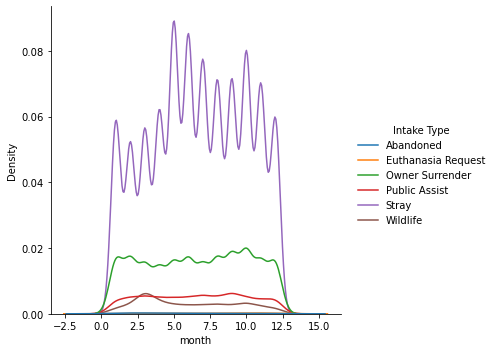

In [298]:
sns.displot(C_i, x="month", hue="Intake Type", kind="kde")

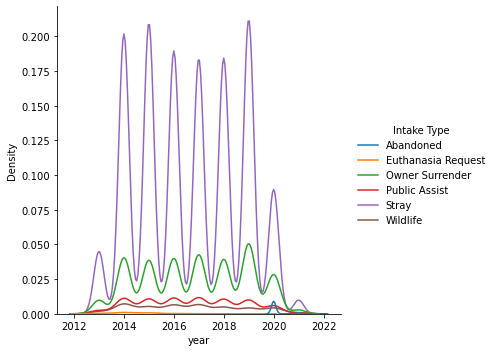

In [299]:
sns.displot(C_i, x="year", hue="Intake Type", kind="kde")